In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime,time
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import itertools
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import statsmodels.formula.api as smf


In [2]:
df=pd.read_excel("/content/drive/MyDrive/ExcelR/Assignment/Forecasting/CocaCola_Sales_Rawdata.xlsx")


In [3]:
df1=df.copy()

In [4]:
df1.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
df1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
df1.dtypes

Quarter     object
Sales      float64
dtype: object

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [8]:
temp=df1.Quarter.str.replace(r'(Q\d)_(\d+)',r'19\2-\1')

In [9]:
df1['quater']=pd.to_datetime(temp).dt.strftime('%b-%Y')

In [10]:
df1.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [11]:
df1=df1.drop(['Quarter'],axis=1)

In [12]:
df1.reset_index(inplace=True)

In [13]:
df1['quater']=pd.to_datetime(df1['quater'])

In [14]:
df1=df1.set_index('quater')

In [15]:
df1.head()

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


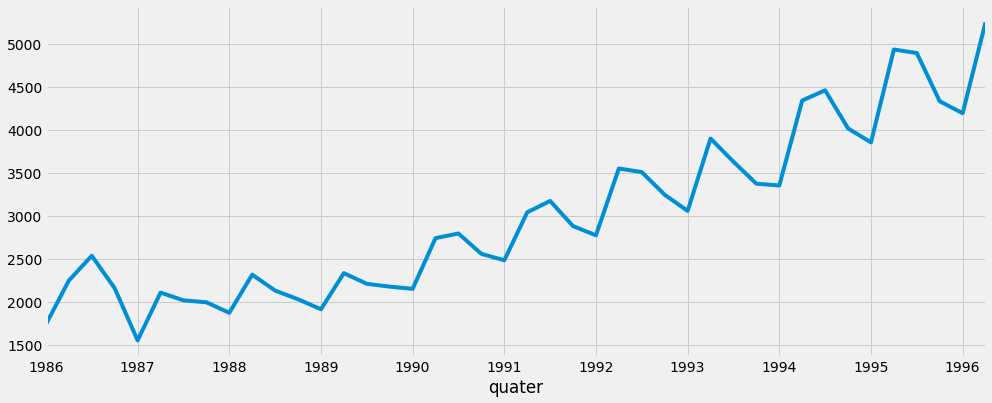

In [16]:
df1['Sales'].plot(figsize=(15,6))
plt.show()

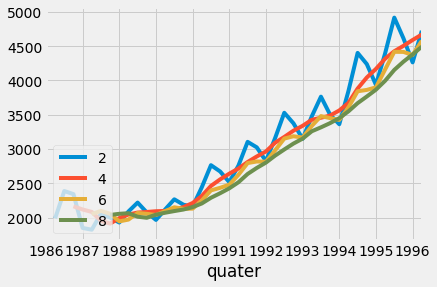

In [17]:
for i in range(2,10,2):
    df1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

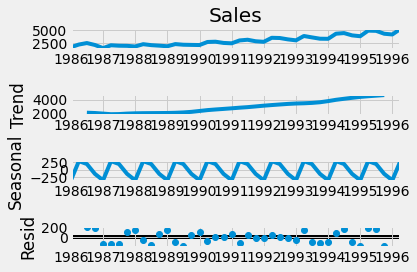

In [18]:
ts_add=seasonal_decompose(df1.Sales,model="additive")
fig=ts_add.plot()
plt.show()


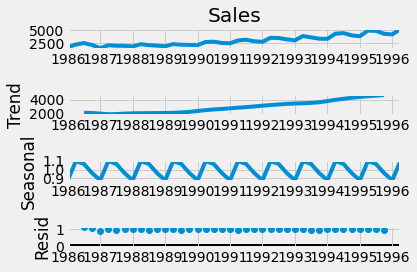

In [19]:
ts_mul= seasonal_decompose(df1.Sales,model="multiplicative")
fig= ts_mul.plot()
plt.show()

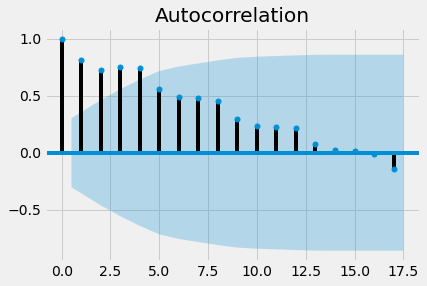

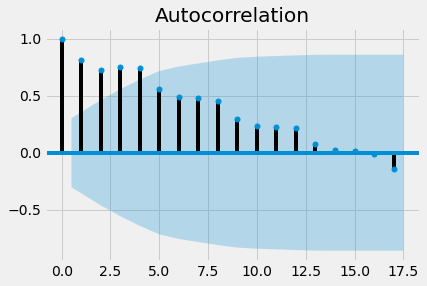

In [20]:
tsa_plots.plot_acf(df1.Sales)

# **Building Time Series forecasting with ARIMA**

In [21]:
X= df1['Sales'].values

In [22]:
size=int(len(X)*0.66)

In [23]:
train, test=X[0:size],X[size:len(X)]

In [24]:
model=ARIMA(train, order=(5,1,0))

In [25]:
model_fit=model.fit(disp=0)

In [26]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   26
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -172.036
Method:                       css-mle   S.D. of innovations            163.191
Date:                Thu, 22 Dec 2022   AIC                            358.071
Time:                        18:39:16   BIC                            366.878
Sample:                             1   HQIC                           360.607
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8444     26.509      1.579      0.114     -10.111      93.800
ar.L1.D.y     -0.1479      0.195     -0.758      0.448      -0.530       0.234
ar.L2.D.y     -0.3127      0.157     -1.996      0.0

## **This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations**

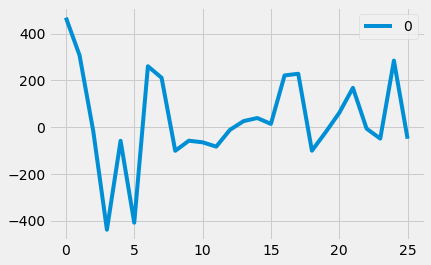

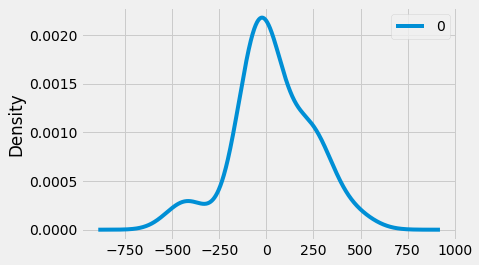

                0
count   26.000000
mean    31.324572
std    202.029942
min   -438.907742
25%    -58.604053
50%     -9.191594
75%    200.235135
max    468.289569


In [27]:
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

## The plot of the residual errors suggests that there may still be some trend information not captured by the model
## The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals)

# **Rolling Forcast ARIMA Model**

In [28]:
history=[x for x in train]

In [29]:
predictions= list()

In [30]:
for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit=model.fit(disp=0)
        output=model_fit.forecast()
        yhat=output[0]
        predictions.append(yhat)
        obs=test[t]
        history.append(obs)
        print('predicted=%f,expected=%f' % (yhat,obs))

predicted=3135.587718,expected=3243.859993
predicted=3188.848659,expected=3056.000000
predicted=3734.223284,expected=3899.000000
predicted=3782.620965,expected=3629.000000
predicted=3355.126081,expected=3373.000000
predicted=3297.217731,expected=3352.000000
predicted=4112.813163,expected=4342.000000
predicted=3961.043275,expected=4461.000000
predicted=4130.785662,expected=4017.000000
predicted=3912.794151,expected=3854.000000
predicted=4687.043943,expected=4936.000000
predicted=4970.517311,expected=4895.000000
predicted=4384.040375,expected=4333.000000
predicted=4229.065612,expected=4194.000000
predicted=5261.676133,expected=5253.000000


In [31]:
error= mean_squared_error(test,predictions)
print("Test MSE: %.3f"% error)

Test MSE: 31594.815


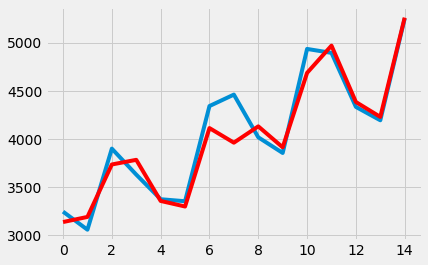

In [32]:
pyplot.plot(test)
pyplot.plot(predictions,color='red')
pyplot.show()

### A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale

# **Comparing Multiple Models**

In [33]:
df2=pd.get_dummies(df,columns=["Quarter"])


In [34]:
df2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']


In [35]:
df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
t=np.arange(1,43)

In [37]:
df2['t']=t

In [38]:
df2['t_sq']=df2['t']*df2['t']

In [39]:
log_Sales=np.log(df2['Sales'])

In [40]:
df2['log_Sales']=log_Sales

In [41]:
df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602


In [42]:
train1,test1=np.split(df2,[int(.67*len(df2))])

In [43]:
linear=smf.ols('Sales ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predlin))**2))
rmselin

580.1224130918635

In [44]:
quad=smf.ols('Sales~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
rmsequad

783.7297975037552

In [45]:
expo=smf.ols('log_Sales~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

588.1405104900199

In [46]:
additive=smf.ols("Sales~Q1+Q2+Q3+Q4",data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
rmseadd

1869.7188209186959

In [47]:
addlinear=smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

596.1526282372297

In [48]:
addquad=smf.ols("Sales~t+t_sq+Q1+Q2+Q3+Q4",data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
rmseaddquad

412.11444360537337

In [49]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train1).fit()
predmul=pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmsemul=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

2374.9194407954456

In [50]:
mullin=smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predmullin=pd.Series(mullin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmsemullin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemullin

5359.687911933238

In [51]:
mul_quad=smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_quad=pd.Series(mul_quad.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3630.561946734775

# **Conclusion**

In [60]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemullin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemullin,rmsequad])}

In [61]:
rmse=pd.DataFrame(output)

In [62]:
print(rmse)

           Model       Values
0  rmse_mul_quad  3630.561947
1        rmseadd  1869.718821
2  rmseaddlinear   596.152628
3    rmseaddquad   412.114444
4       rmseexpo   588.140510
5        rmselin   580.122413
6        rmsemul  2374.919441
7     rmsemullin  5359.687912
8       rmsequad   783.729798


# rmseaddquad= 412.114444 is the best RMSE value 